# Tutorial Errata

Just a quick errata to the recorded tutorial (nothing too bad).

An important note is that models do not make a classification! Models simply give you a probability (i.e. a number between 0 and 1). To make a classification one must first set a decision threshold - a prediction less than the threshold will be classified as 0 and a prediction greater than the threshold will be classified as 1.

So at the end of the tutorial when I talk about which metric should you choose to optimize (Loss/Sensitivity/Specificity/Precision/AUC/Cross-entropy), the loss, sensitivity, specificity and precision should be used when you want to build a model for decision making. While if all you care about is making the best classifier possible then you want to choose AUC and cross-entropy.

This is becase the loss, sensitivity, specificity and precision is a metric on how well the model is making the classification (i.e. after the threshold). While the AUC and cross-entropy is a metric on the model's probabiliy prediction (i.e. before the threshold).

That said, typically have a low cross-entropy would mean you have a high sensitivity/specificty/precision/etc. But this won't always be true.

$$\large \textrm{Sigmoid}(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x}$$

$$z=\beta_0 + \beta_1X_1 + \cdots + \beta_nX_n$$

$$\mathbb{P}[\textrm{Default}|X]=\textrm{Sigmoid}(z)$$

Sigmoid is just a function

Logistic regression is using linear regression to make a classification. The way to make a probability is to take the linear regression and pass it through the sigmoid.

# Notes

### Logistic Regression
So typical linear regression isn't very good for classification for multiple reason. But the best one is that the output of linear regression can be -10 all the way to +1000. It can be what ever value it wants to be. But we don't like this because we are interested in what is the probability that a cell is cancerous. If you tell me -100 I have no idea what that means.

Instead of using linear regression, we use logistic regression which is very simple:

$$p(x)=\frac{\exp(\beta_0 + \sum_{j=1}^p\beta_jx_j)}{1+\exp(\beta_0 + \sum_{j=1}^p\beta_jx_j)}$$

And instead of minimising the mean squared error, we minimise what is known as the binary-cross-entropy loss function

$$L=-\frac{1}{m}\sum_{i=1}^mY_i\log(p(x_i)) + (1-Y_i)\log(1-p(x_i))$$

This is called the binary-cross-entropy because it only works when you have two classes (two labels). The general cross entropy when we have labels $1, 2, 3, ..., K$ is

$$L=-\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K Y_i^{(k)}\log(p_i^{(k)})$$

Where 

$$Y_i^{(k)}=
\begin{cases} 
      1 & \textrm{If the } i^{\textrm{th}}\ \textrm{datapoint is the label } k \\
      0 & \textrm{otherwise}
\end{cases}$$

and $p_i^{(k)}=\mathbb{P}[Y = k | x_i]$, that is the probability that $x_i$ is the label $k$.

Importantly, logistic regression can only model linear decision boundaries

# Generative vs Discriminate Models

It is worth our time to look at the difference between generative and discriminative models.

**Discriminative Models** are the models that we have been looking so far. In particular with discriminative models we are trying to maximise the likelihood function
$$\large \mathcal{L}(\theta) = \prod^n_{i=1}\mathbb{P}[y_i|x_i; \theta]$$

That is, we are trying to maximise the **conditional probability** of $y_i$ given $x_i$. Hence discriminative models are known as conditional models. So we are trying to directly trying to model the output $y_i$, given the input $x_i$.

Exampls of discrimnative models are: Knn and logistic regression


In contrast, with **Generative Models** the likelihood function we want to optimise is
$$\large \mathcal{L}(\theta)=\prod^n_{i=1}\mathbb{P}[x_i, y_i; \theta]$$
That is, the **joint probability** of the input $x_i$, and the output $y_i$. Then using some probability theory, we can simplify this likelihood function to
$$\large \mathcal{L}(\theta)=\prod^n_{i=1}\mathbb{P}[x_i, y_i; \theta]=\prod^n_{i=1}\mathbb{P}[x_i| y_i; \theta]\ \mathbb{P}[y_i]$$

So now, with generative models, we are actually interested in modeling $\mathbb{P}[x_i| y_i; \theta]$ and $\mathbb{P}[y_i]$. That is, the probability of the input $x_i$, conditioned on the output $y_i$, and the probability of the output $y_i$, itself. Note the difference with discriminative models where we are interesed in modeling $\mathbb{P}[y_i| x_i; \theta]$ instead.

If you don't understand that then don't worry, the following should make more sense.

# Generative Analysis and The Allgory of the Cave/The Platonic Ideal

Taken from the wikipedia page Allegory of the Cave (https://en.wikipedia.org/wiki/Allegory_of_the_cave):

    In the allegory "The Cave," Socrates describes a group of people who have lived chained to the wall of a cave all their lives, facing a blank wall. The people watch shadows projected on the wall from objects passing in front of a fire behind them and give names to these shadows. The shadows are the prisoners' reality, but are not accurate representations of the real world. The shadows represent the fragment of reality that we can normally perceive through our senses, while the objects under the sun represent the true forms of objects that we can only perceive through reason. Three higher levels exist: the natural sciences; mathematics, geometry, and deductive logic; and the theory of forms.

<img align="center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/An_Illustration_of_The_Allegory_of_the_Cave%2C_from_Plato%E2%80%99s_Republic.jpg/800px-An_Illustration_of_The_Allegory_of_the_Cave%2C_from_Plato%E2%80%99s_Republic.jpg">



From Reddit: 

https://old.reddit.com/r/explainlikeimfive/comments/1v3w1l/eli5_what_is_platonic_idealism/ceohw8n/
    
    According to Plato, there's the world of ideas (abstract), and the world of shadows of those ideas (concrete). So imagine there is a 'perfect chair' in the world of ideas. When I think of a chair, and you think of a chair, they will both resemble the perfect chairness, but we can't grasp that perfect chair.

    Plato's most famous metaphor was this one: a group of people are living in a cave, hands and feet bound, facing the wall. They see the shadows of the outside world on the wall, and that's their only reality. If one of those people were to escape and go outside, he would see the 'real' abstract world of ideas, which is perfect. But if he were to go back to tell his comrades that they should come outside with him because they don't know the real world, they would not believe him.

    This is not limited to objects, according to Plato there were perfect ideas of beauty, virtue, and other kinds of excellence. Plato had a huge influence on Christian ideology, for which this ideal world is heaven, and earth merely the shadow-world.


https://old.reddit.com/r/explainlikeimfive/comments/1v3w1l/eli5_what_is_platonic_idealism/ceothnu/

    If I say the word "chair" to you, what do I mean? Do I mean a specific chair? Probably not; then we would have to have different words for every chair in the world. Do I mean any structure that someone can sit on? Probably not; then we wouldn't distinguish between chairs, sofas, stools, etc. Do I mean any structure that's shaped roughly like this? (makes vague chair-like gestures) Probably not; because we can imagine a mountain shaped like a chair, but we wouldn't call it a chair, we'd say that it's a mountain that happens to be shaped like a chair. So what do I actually mean when I say the word "chair?"

    Plato's answer to this question was that "chair" doesn't just mean the usage of an object, or the shape of an object, or the composition of an object, but refers to how closely an object matches some pre-existing concept (or set of concepts) in our minds. He said that the term "chair" refers to an object that doesn't exist in this physical world – we can imagine it, but not actually make or touch it – and this object, by definition, has every quality that distinguishes a chair from anything that is not a chair. That object is called the Platonic ideal of a chair – it is everything that makes a chair chair-like, and nothing that doesn't make it chair-like. It's the chair that our mind imagines when someone says "chair" – the chair that we compare other objects to to determine if they are chairs at all.


### Small Note

The platonic ideal is not widely accepted in philosphy, and is an outdated idea with many issues. But an interesting idea none the less.

### TL;DR

Essentially the platonic ideal is the belief that there is there is an idea known as a "chair", moreover that there exists a perfect example of a "chair". All we can see are simply the shadows of a "chair", or only imperfect representations of a chair. 

So when we are doing discriminate analysis we are essentially saying this. That is, there is a perfect example of a person who defaults on our loan, and there is also a perfect example on someone who repays the loan. All of our datapoints are therefore imperfect examples of someone who defaults, that is perfect example of someone who default plus some noise.

In this case the "platonic ideal" of someone who repayed the loan has these properties
- Loan duration of 19.2
- Loan amount of 2985.45
- Age of 36.22

While the "platonic ideal" of someone who defaulted the loan has these properties
- Loan duration of 24.86
- Loan amount of 3938.13
- Age of 33.96

Then when we want to classify someone as either repay or default we simply compare them to these platonic ideals and choose which ever it is the most similar to.

In [1]:
import pandas as pd

df = pd.read_csv("german_credit.csv").loc[:, ['duration', 'amount', 'age', 'default']]

In [2]:
df.loc[df["default"] == 0, ['duration', 'amount', 'age']].mean()

duration      19.207143
amount      2985.457143
age           36.224286
dtype: float64

In [3]:
df.loc[df["default"] == 1, ['duration', 'amount', 'age']].mean()

duration      24.860000
amount      3938.126667
age           33.963333
dtype: float64

Consider the following dataset

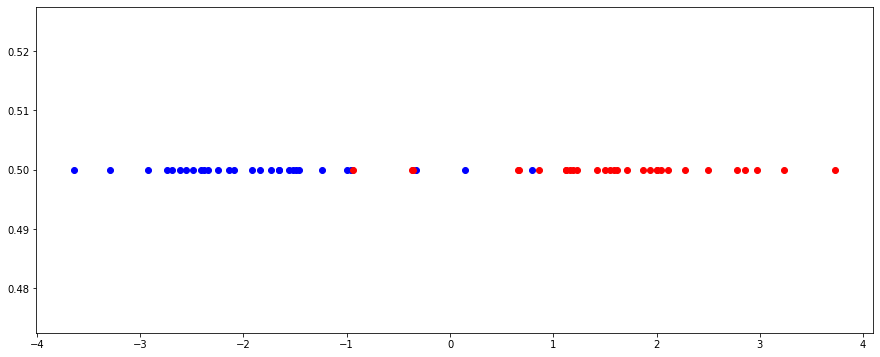

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(2)
N = 30
plt.figure(figsize=(15, 6))
plt.plot(np.random.normal(-1.5, 1, N), np.ones(N)*0.5, 'o', color='blue')
plt.plot(np.random.normal(1.5, 1, N), np.ones(N)*0.5, 'o', color='red');

With generative models we are now interested in
$$\large \mathbb{P}[x_i | y_i=\textrm{red}]\quad \textrm{and}\quad \mathbb{P}[x_i | y_i=\textrm{blue}]$$

So really, we are now splitting the dataset up into 2 parts: (1) the data points of only `red` and (2) the data points of only `blue`. Then we actually want to model how these seperate data sets actually look like. In particular, we create
1. One model for $y_i=\textrm{red}$, which is $\mathbb{P}[x_i | y_i=\textrm{red}]$ - i.e. the platonic ideal for red
2. Another mode for $y_i=\textrm{blue}$, which is $\mathbb{P}[x_i | y_i=\textrm{blue}]$ - i.e. the platonic ideal for blue

Let's assume that $\mathbb{P}[x_i | y_i=\textrm{red}]\sim \mathcal{N}(1.5, 1)$ and $\mathbb{P}[x_i | y_i=\textrm{blue}]\sim \mathcal{N}(-1.5, 1)$

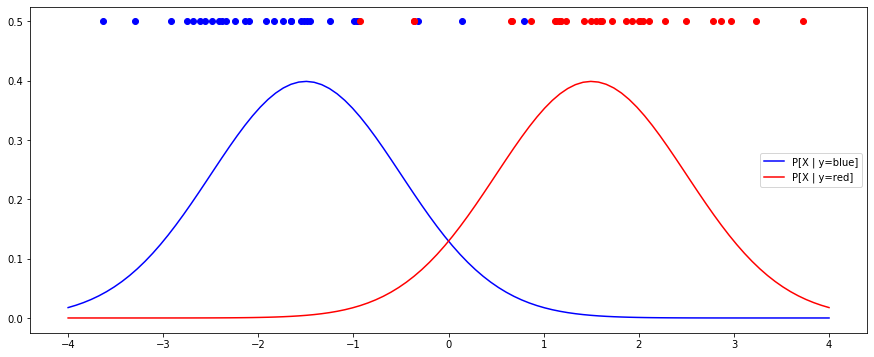

In [2]:
np.random.seed(2)
N = 30
plt.figure(figsize=(15, 6))
plt.plot(np.random.normal(-1.5, 1, N), np.ones(N)*0.5, 'o', color='blue')
plt.plot(np.random.normal(1.5, 1, N), np.ones(N)*0.5, 'o', color='red')

x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, -1.5, 1), color='blue', label='P[X | y=blue]')
plt.plot(x, norm.pdf(x, 1.5, 1), color='red', label='P[X | y=red]')

plt.legend();

### QDA vs LDA

So we are continuing down the path of generative models and now we are looking at quadratic and linear discriminant analysis. So, just like with Naive Bayes we start with Bayes Theorem
$$\mathbb{P}[Y=y\,|\,X] = \frac{\mathbb{P}[X\,|\,Y=y]\times \mathbb{P}[Y=y]}{\mathbb{P}[X]}$$

In LDA and QDA we now make the assumption that 

$$P[X\, | \, Y=y]\sim\textrm{Multivariate Normal Distribution} = \mathcal{N}(\mu_y, \Sigma_y)$$

**Quadratic Discriminant Analysis**

In particular, QDA assumes that each label (or each class) has their own different mean $\mu_y$ and their own different covariance $\Sigma_y$.

**Linear Discriminant Analysis**

LDA assumes that each label has their own different mean $\mu_y$ BUT all the labels share the same covariance $\Sigma$.


Note the difference with QDA and LDA is that the 
- For QDA, the **Covariance Matrix** in QDA belongs to the label
- For LDA, the **covariance matrix** is shared across labels

**Importantly, both LDA and QDA use Bayes' Theorem for classification**

### What a Multivariate Gaussian Looks like 

<center><img src="https://cookierobotics.com/007/example_same_diagonals.png"></center>

### Comparing LDA vs QDA

In [1]:
# Code taken from
# https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html

from lda_qda_fake_data_plots import plot_lda_vs_qda_with_fake_data
from lda_qda_fake_data_plots import plot_lda_vs_qda_with_fake_data_include_decision_area
from lda_qda_fake_data_plots import plot_fake_data

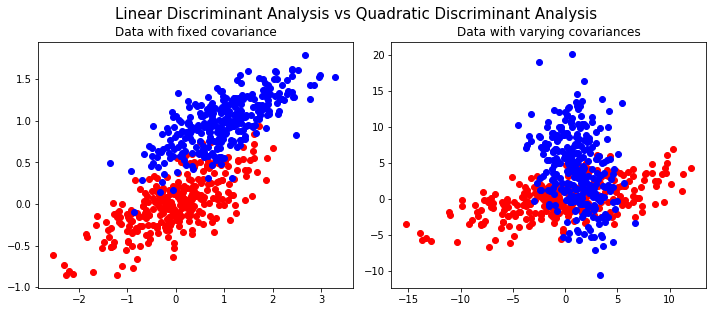

In [2]:
plot_fake_data()

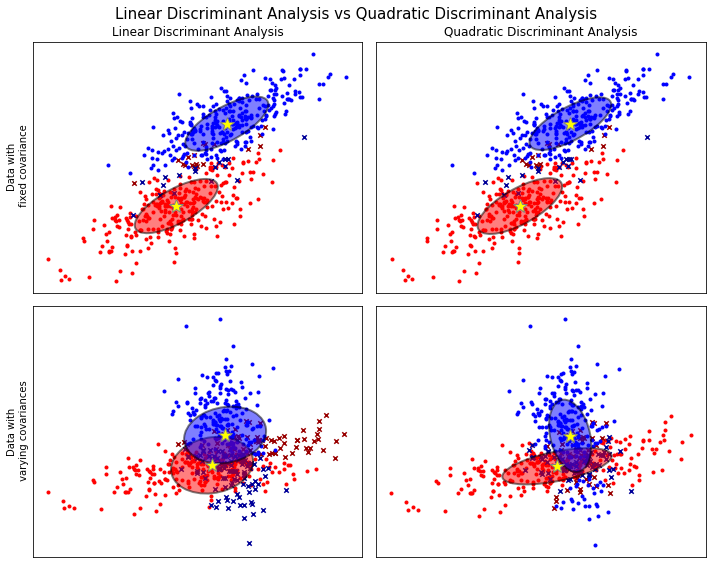

In [3]:
plot_lda_vs_qda_with_fake_data()

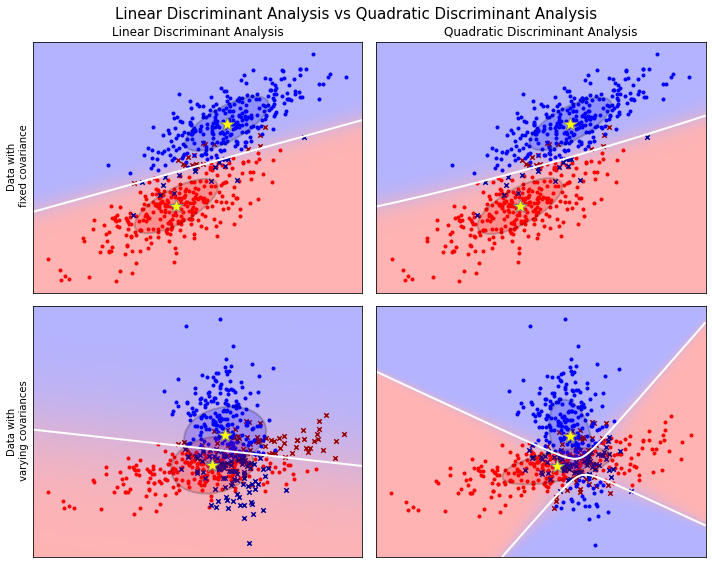

In [4]:
plot_lda_vs_qda_with_fake_data_include_decision_area()

### LDA and Logistic Regression

So it turns out that LDA actually has a relationship Linear regression. Without going into all the details, one can show that

$$\textrm{LDA Models} \implies \textrm{Logistic Regression}$$
Meaning that if you have data that satisfy the all the assumptions that LDA makes (multivariate gaussian), then this data will also satisfy the assumptions that are made in Logistic regression.

But, if your data satisfies the Logistic regression assumptions, in general, it won't satisfy the assumptions made by LDA models.

This is all to mean that Logistic regression models can model everything that LDA can model. More specifically, for every LDA model that you build there is an equivalent logistic regression model that will give you the same predictions. But, for every logistic regression model, in general, you cannot build an equivalent LDA model.

Moreover, since normal distributions implies a LDA model, write now we only have that 
$$\textrm{Normal Distribution}\implies \textrm{Logistic Regression}$$
But, it turns out that
$$\textrm{Poisson Distribution}\implies \textrm{Logistic Regression}$$
and
$$\textrm{Power Distribution}\implies \textrm{Logistic Regression}$$

Meaning that instead of requiring $x|Y=y \sim \textrm{Normal Distribution}$ to build an equivalent logistic regression model, we can also have $x|Y=y \sim \textrm{Poisson Distribution}$ and $x|Y=y \sim \textrm{Power Distribution}$. For all three of these assumputions there will be an equivalent logistic regression model.

But LDA only works for $x|Y=y \sim \textrm{Normal Distribution}$.

As a quick note, these are not the only 3 distributions that imply logistic regression. In fact any class of exponential distribution that varies by one natural parameter implies logistic regression. Fancy way to say that that distributions needs to have an exponential and only chage by 1 parameter.

**QDA $\neq$ Logistic Regression**

Note that only LDA implies logistic regression, but QDA doesn't. The simplest explaination is that logistic regression only models linear decision boundaries, but because QDA allows for quadratic (non-linear) decision boundaries logistic regression can't model this.

Moreover, that this behaviour can also be explained by the fact that you require exponential distributions that change by 1 parameter. In LDA only the mean changes for each class, that is only 1 parameter changes. But QDA changes 2 parameters for each class: the mean and covariance matrix changes for each label.

**So Why Use LDA?**

So if Logistic regression can model all these differnt distributions, why don't we always use Logistic regression instead of lda?

The answer is information.

Because LDA makes more assumptions about the dataset (multivariate gaussian), if these assumptions are correct then LDA will end up being more accurate than linear regression. 

You can think about this as how the model gets it's information. 
1. It can get it's information from the data
2. It can get it's information from the modeler (us)

So with LDA, we are directly telling the model that the dataset that we have is gaussian. It no longer needs to find this information itself. Now because it knows this information, the model can then use that information to build a better model. Of course, though, if that assumption is not correct then the model will perform worse.

Generally speaking, though, if you have LOTS and LOTS of data, Logistic regression can simply bulldoze it's way through this issue. Because if it has enough data, then it can simply learn that the dataset is gaussian by itself.

So really, LDA are really good when you have small datasets and you know the dataset is gaussian (which generally speaking datasets are). But when you have very large datasets (10,000+) you may as well just use Logistic regression.

**Logistic regression is asymptocially equivalent to LDA**

This means that as the number of datapoints approach infinity, the decision boundary derived from logistic regression will the exact same as that of the LDA decision boundary. Importantly while it is true that every LDA model there is an equivalent logistic regression model - it is not true that if you train a logistic regression and LDA model separately then they will be the same (you are not coverting a LDA model to a logistic regression model). 

But the key is that in the limit as the number of datapoints approach infinity, then training a logistic regression model will give you the exact same output as if you trained a LDA model separetely. 

Of course, in the real world we don't have an infinite amount of data, we only have a finite amount of data.

**LDA is more efficient**

This means that, if the multivariate-gaussian assumption is true, than LDA will reach the true decision boundary much quicker than the logistic regression will. Which is the reason why, when you have small datasets you should use LDA (if you have gaussian data) as opposed to linear regression.

But of course, the good thing about logistic regression is that, once you have enough data, it can by itself learn which distribution the input is drawn from (hence the name machine learning).